In [2]:
### READ RESULTS INTO PANDAS DATAFRAME
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

resultsdir = "../../../ae-results/"
# list all directories in resultsdir
#configs = [d for d in os.listdir(resultsdir) if os.path.isdir(os.path.join(resultsdir, d))]
configs = ['Baseline.yaml',
            'CoMeT125-3.yaml',
            'CoMeT250-3.yaml',
            'CoMeT500-3.yaml',
            'CoMeT1000-3.yaml',
            'Graphene1000.yaml',
            'Graphene500.yaml',
            'Graphene250.yaml',
            'Graphene125.yaml',
            'Hydra1000.yaml',
            'Hydra500.yaml',
            'Hydra250.yaml',
            'Hydra125.yaml',
            'REGA1000.yaml',
            'REGA500.yaml',
            'REGA250.yaml',
            'REGA125.yaml',
            'PARA1000.yaml',
            'PARA500.yaml',
            'PARA250.yaml',
            'PARA125.yaml',
        ]
#configs = ['Baseline.yaml', 'CMS1000-100.yaml', 'Graphene1000.yaml', 'CMS1000-100-c.yaml']
# print found configs
print('Found configs: {}'.format(configs))
# list all directories under all configs
workloads = []
for c in configs:
    workloads.append([d for d in os.listdir(os.path.join(resultsdir, c)) if os.path.isdir(os.path.join(resultsdir, c, d))])
# find only the intersection of all workloads
workloads = list(set.intersection(*map(set, workloads)))
# print found workloads
print('Found workloads: {}'.format(workloads))

stats_per_config_workload = []

# for every config + workload directory
for c in configs:
    for w in workloads:
        # find all files in the directory
        files = [f for f in os.listdir(os.path.join(resultsdir, c, w)) if os.path.isfile(os.path.join(resultsdir, c, w, f))]
        # find the stats file
        stat_files = [f for f in files if f.endswith('.stats')]
        # if there is a stats file
        if stat_files:
            for stat_file in stat_files:
                # if the stats_file has less than three lines skip it
                if len(open(os.path.join(resultsdir, c, w, stat_file)).readlines()) < 3:
                    continue
                
                # print the name of the stats_file
                print('Found stats file: {}'.format(os.path.join(os.path.join(resultsdir, c, w, stat_file))))

                extension = ''
                # if stats_file file name itself does not start with DDR4, parse it a bit
                if not stat_file.startswith('DDR4'):
                    # get the config name from the stats_file name
                    extension = '_'.join(stat_file.split('_')[:-1])
                    # prepend underscore to extension
                    extension = '_' + extension

                # read the stats file, name columns: 'name', 'value', 'description'
                df = pd.read_csv(os.path.join(resultsdir, c, w, stat_file), header=None).T
                df.columns = df.iloc[0]
                df.drop(0,inplace=True)
                # add a new column called 'config' with the config name
                df['config'] = c + extension
                # add a new column called 'workload' with the workload name
                df['workload'] = w
                # print the stats file
                # print('Config: {}, Workload: {}, Stats: {}'.format(c, w, df))
                # append the stats to the list
                df.reset_index(inplace=True, drop=True)
                stats_per_config_workload.append(df)
        else:
            print('Config: {}, Workload: {}, Stats: No stats file found'.format(c, w))

# concatenate all stats into one dataframe
stats = pd.concat(stats_per_config_workload)

# find elements where workload does not contain '-'
# these are multi core workloads
stats = stats[~stats['workload'].str.contains('-')]

# remove these two workloads: stream_10.trace and random_10.trace
stats = stats[~stats['workload'].isin(['stream10_200.trace', 'random10_200.trace'])]
# also from workloads
workloads = [w for w in workloads if not w in ['stream10_200', 'random10_200.trace']]

#remove configs that has RH32, AH and AAH in the name
stats = stats[~stats['config'].str.contains('RH32')]
stats = stats[~stats['config'].str.contains('AH')]
stats = stats[~stats['config'].str.contains('AAH')]

# replace 'Baseline' with 'Baseline0'
stats['config'] = stats['config'].str.replace('ae-results/', '')
stats['config'] = stats['config'].str.replace('../results/', '')
stats['config'] = stats['config'].str.replace('Baseline', 'Baseline0')
stats['config'] = stats['config'].str.replace('-4-512-128', '')
stats['config'] = stats['config'].str.replace('-3', '')
stats['config'] = stats['config'].str.replace('-1', '')
stats['config'] = stats['config'].str.replace('-2', '')
stats['config'] = stats['config'].str.replace('-m25', '')

# add a new column that stores in integer the number in the config name
stats['nrh'] = stats['config'].str.extract('(\d+)').astype(int)

# remove numbers from config names
stats['config'] = stats['config'].str.replace('\d+', '')

# remove yaml from config names
stats['config'] = stats['config'].str.replace('.yaml', '')

print(stats['workload'].unique())
stats_copy = stats.copy()


Found configs: ['Baseline.yaml', 'CoMeT125-3.yaml', 'CoMeT250-3.yaml', 'CoMeT500-3.yaml', 'CoMeT1000-3.yaml', 'Graphene1000.yaml', 'Graphene500.yaml', 'Graphene250.yaml', 'Graphene125.yaml', 'Hydra1000.yaml', 'Hydra500.yaml', 'Hydra250.yaml', 'Hydra125.yaml', 'REGA1000.yaml', 'REGA500.yaml', 'REGA250.yaml', 'REGA125.yaml', 'PARA1000.yaml', 'PARA500.yaml', 'PARA250.yaml', 'PARA125.yaml']
Found workloads: ['471.omnetpp', '523.xalancbmk', '444.namd', '458.sjeng', '429.mcf', 'h264_encode', '447.dealII', '544.nab', '511.povray', 'tpch2', '526.blender', 'bfs_cm2003', '433.milc', '538.imagick', '502.gcc', 'jp2_decode', '541.leela', '525.x264', 'jp2_encode', 'ycsb_dserver', '462.libquantum', '464.h264ref', '445.gobmk', '483.xalancbmk', 'tpch6', '470.lbm', 'grep_map0', '500.perlbench', '505.mcf', 'ycsb_aserver', '481.wrf', 'ycsb_cserver', '520.omnetpp', '557.xz', 'bfs_ny', '531.deepsjeng', '450.soplex', '482.sphinx3', '456.hmmer', 'ycsb_bserver', '549.fotonik3d', 'h264_decode', '436.cactusADM',

In [3]:





# use seaborn-deep style
sns.set(font_scale=1.0)
sns.set_style("whitegrid")
sns.set_palette("pastel", n_colors=4)

stats = stats_copy.copy()



# instructions per cycle (IPC) is record_cycles_insts_0 / record_cycs_core_0
stats['ramulator.ipc'] = stats['ramulator.record_insts_core_0'] / stats['ramulator.record_cycs_core_0']


stats['ramulator.rbmpki'] = (stats['ramulator.row_conflicts_channel_0_core'] + stats['ramulator.row_misses_channel_0_core']) /\
                            stats['ramulator.record_insts_core_0'] * 1000


# copy the IPC of the baseline config as to all configs
baseline = stats[stats['config'] == 'Baseline0']
baseline = baseline[['workload', 'ramulator.ipc', 'ramulator.read_latency_avg_0', 'ramulator.rbmpki', 'ramulator.window_full_stall_cycles_core_0']]
# baseline
baseline.columns = ['workload', 'ramulator.baseline_ipc', 'ramulator.baseline_read_latency_avg_0', 'ramulator.baseline_rbmpki', 'ramulator.baseline_stall_cycles']
print('baseline:')
print(baseline)

stats = pd.merge(stats, baseline, on='workload')


#hydra baseline
# hydra_baseline = stats[stats['config'] == 'Hydra-Baseline']
# hydra_baseline = hydra_baseline[['workload', 'ramulator.ipc']]
# # hydra_baseline
# hydra_baseline.columns = ['workload', 'ramulator.hydra_baseline_ipc']
# stats = pd.merge(stats, hydra_baseline, on='workload')

stats['ramulator.normalized_ipc'] = stats['ramulator.ipc'] / stats['ramulator.baseline_ipc']
stats['ramulator.normalized_read_latency'] = stats['ramulator.read_latency_avg_0'] / stats['ramulator.baseline_read_latency_avg_0']
stats['ramulator.normalized_stall_cycles'] = stats['ramulator.window_full_stall_cycles_core_0'] / stats['ramulator.baseline_stall_cycles']
stats['ramulator.normalized_rbmpki'] = stats['ramulator.rbmpki'] / stats['ramulator.baseline_rbmpki']


# normalized ipc for hydra is not correct, so we overwrite it with the correct value
# stats.loc[stats['config'].str.contains('Hydra'), 'ramulator.normalized_ipc'] = stats['ramulator.ipc'] / stats['ramulator.hydra_baseline_ipc']

# add the geometric normalized ipc average as a new workload to every config
geometric_mean = stats.groupby(['config','nrh'])['ramulator.normalized_ipc'].apply(lambda x: x.prod()**(1.0/len(x))).reset_index()
geometric_mean['workload'] = 'GeoMean'

#print(stats['config'])


stats = pd.concat([stats, geometric_mean])
print(stats['config'])
print(stats['workload'])
# print data with workload = GeoMean
print(stats[stats['workload'] == 'bfs_ny'])

baseline:
         workload ramulator.baseline_ipc  \
0     471.omnetpp               3.440069   
0   523.xalancbmk               2.923912   
0        444.namd               3.952819   
0       458.sjeng               3.691404   
0         429.mcf               0.509945   
..            ...                    ...   
0    ycsb_abgsave                2.61583   
0    ycsb_eserver               1.993455   
0         403.gcc               3.878083   
0         519.lbm               0.701337   
0         wc_map0                2.03914   

   ramulator.baseline_read_latency_avg_0 ramulator.baseline_rbmpki  \
0                              47.947463                  0.054295   
0                              44.029382                   0.17985   
0                              47.081408                  0.017435   
0                              67.093254                  0.158525   
0                              95.396726                 51.179315   
..                                   ... 

In [4]:
stats_clean = stats.copy()

In [5]:
# create a copy of stats with the columns config, workload, normalized_ipc
stats_summary = stats[['config', 'workload', 'ramulator.normalized_ipc','nrh']].copy()
# print to csv fiile
stats_summary.to_csv('single_comparison_summary.csv', index=False)



order = ['GeoMean', 'h264_encode', '511.povray', '481.wrf', '541.leela', '538.imagick', '444.namd', '447.dealII', '464.h264ref', '456.hmmer', '403.gcc', '526.blender', '544.nab', '525.x264', '508.namd', 'grep_map0', '531.deepsjeng', '458.sjeng', '435.gromacs', '445.gobmk', '401.bzip2', '507.cactuBSSN', '502.gcc', 'ycsb_abgsave', 'tpch6', '500.perlbench', '523.xalancbmk', 'ycsb_dserver', 'ycsb_cserver', '510.parest', 'ycsb_bserver', 'ycsb_eserver', 'tpcc64', 'ycsb_aserver', '557.xz', '482.sphinx3', 'jp2_decode', '505.mcf', 'wc_8443', 'wc_map0', '436.cactusADM', '471.omnetpp', '473.astar', 'jp2_encode', 'tpch17', '483.xalancbmk', '462.libquantum', 'tpch2', '433.milc', '520.omnetpp', '437.leslie3d', '450.soplex', '459.GemsFDTD', '549.fotonik3d', '434.zeusmp', '519.lbm', '470.lbm', '429.mcf', 'h264_decode', 'bfs_ny', 'bfs_cm2003', 'bfs_dblp']

stats['workload'] = pd.Categorical(stats['workload'], categories=order, ordered=True)




In [6]:
stats_copy = stats.copy()

#stats = stats[(stats['workload'] != 'bfs_ny' ) & (stats['workload'] != 'bfs_cm2003' ) & (stats['workload'] != 'bfs_dblp' )]
# print the normalized ipc of CMS for the geomean at nrh=1000
print(1-(stats[(stats['config']=='CoMeT1000') & (stats['nrh']==1000) & (stats['workload']=='GeoMean')]['ramulator.normalized_ipc']))
print(1-(stats[(stats['config']=='CoMeT1000') & (stats['nrh']==1000)]['ramulator.normalized_ipc'].min()))
print(1-(stats[(stats['config']=='CoMeT125') & (stats['nrh']==125) & (stats['workload']=='GeoMean')]['ramulator.normalized_ipc']))
print(1-(stats[(stats['config']=='CoMeT125') & (stats['nrh']==125)]['ramulator.normalized_ipc'].min()))



print((stats[(stats['config']=='CoMeT1000') & (stats['nrh']==1000)]['ramulator.normalized_read_latency']).mean())
print((stats[(stats['config']=='CoMeT125') & (stats['nrh']==125)]['ramulator.normalized_read_latency']).mean())



stats = stats_copy.copy()


1    0.001904
Name: ramulator.normalized_ipc, dtype: object
0.026487635413201538
2    0.040142
Name: ramulator.normalized_ipc, dtype: object
0.1982126840199625
1.0018642881539466
1.0530059529317986


In [7]:
import re

sns.set(font_scale=1.0)
sns.set_style("whitegrid")
#sns.set_palette("viridis", n_colors=5)

# sns set color palette
comet_palette = ['#648FFF', '#785EF0', '#DC267F', '#FE6100', '#FFB000']
sns.set_palette(comet_palette, n_colors=5)

# drop all configs except the ones with CMS 
stats_no_baseline = stats[stats['config'].str.contains('CoMeT')]
stats_comparison = stats[~stats['config'].str.contains('CoMeT')]


# change all configs with name starting with CMS to CMS
stats_no_baseline['config'] = stats_no_baseline['config'].apply(lambda x: 'CoMeT' if re.search(r'CoMeT\d+', x) else x)

print(stats_comparison['config'].unique())

# remove all config integers from stats_comparison
stats_comparison['config'] = stats_comparison['config'].apply(lambda x: re.sub(r'\d+', '', x))

print(stats_comparison['config'].unique())



['Baseline0' 'Graphene1000' 'Graphene500' 'Graphene250' 'Graphene125'
 'Hydra1000' 'Hydra500' 'Hydra250' 'Hydra125' 'REGA1000' 'REGA500'
 'REGA250' 'REGA125' 'PARA1000' 'PARA500' 'PARA250' 'PARA125']
['Baseline' 'Graphene' 'Hydra' 'REGA' 'PARA']


/tmp/ipykernel_1452713/1250704128.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stats_no_baseline['config'] = stats_no_baseline['config'].apply(lambda x: 'CoMeT' if re.search(r'CoMeT\d+', x) else x)
/tmp/ipykernel_1452713/1250704128.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stats_comparison['config'] = stats_comparison['config'].apply(lambda x: re.sub(r'\d+', '', x))


['Graphene' 'Hydra' 'REGA' 'PARA' 'CoMeT']


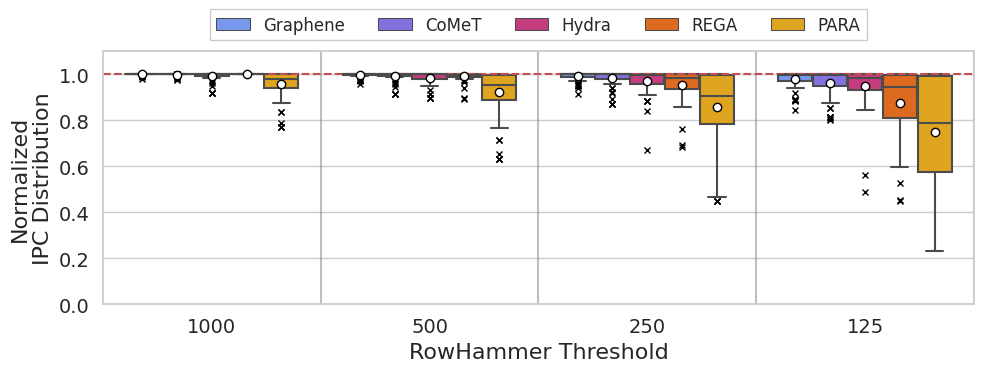

In [16]:


# merge stats_comparison and stats_no_baseline
stats_new = pd.concat([stats_comparison, stats_no_baseline])

# remove config Baseline0 from stats_no_baseline
stats_new = stats_new[~stats_new['config'].str.contains('Baseline')]
print(stats_new['config'].unique())


# order nRH from high to low
#stats_no_baseline['counters'] = pd.Categorical(stats_no_baseline['counters'], categories=[128], ordered=True)
#
#stats_no_baseline['hashes'] = pd.Categorical(stats_no_baseline['hashes'], categories=[4], ordered=True)
#
#stats_no_baseline['entries'] = pd.Categorical(stats_no_baseline['entries'], categories=[32,64,128,256,512], ordered=True)
stats_new['nrh'] = pd.Categorical(stats_new['nrh'], categories=[1000,500,250,125], ordered=True)

# order config in this order: CMS, Graphene
stats_new['config'] = pd.Categorical(stats_new['config'], categories=['Graphene','CoMeT', 'Hydra', 'REGA', 'PARA'], ordered=True)

#boxplot of normalized IPC
fig, ax = plt.subplots(figsize=(10, 4))
# show mean values as well
ax = sns.boxplot(x="nrh", y="ramulator.normalized_ipc", hue="config", data=stats_new, showmeans=True,
                  meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black"}, showfliers=True, 
                  flierprops={'marker': 'x', 'markerfacecolor': 'black', 'markeredgecolor': 'black'})
ax.set_xlabel('RowHammer Threshold')
ax.set_ylabel('Normalized\nIPC Distribution')
# draw a red line at y = 1.0, label it as baseline IPC
ax.axhline(y=1.0, color='r', linestyle='--')
# write above the red line 'baseline IPC'
#ax.text(0.02, 0.93, 'baseline IPC', color='#e74c3c', transform=ax.transAxes, fontsize=15)
# extend the y axis to 1.2
ax.set_ylim(0, 1.1)
# color the 5th y tick red
#ax.get_yticklabels()[4].set_color('#e74c3c')
# make axis tick font bigger
ax.tick_params(axis='both', which='major', labelsize=14)
# draw vertical lines to separate the rowhammer threshold values
ax.axvline(x=0.5, color='grey', linestyle='-', alpha=0.5)
ax.axvline(x=1.5, color='grey', linestyle='-', alpha=0.5)
ax.axvline(x=2.5, color='grey', linestyle='-', alpha=0.5)
ax.axvline(x=3.5, color='grey', linestyle='-', alpha=0.5)
# make x and y axis labels bigger
ax.xaxis.label.set_size(16)
ax.yaxis.label.set_size(16)

# Customize the whiskers and borders
ax.lines[0].set_color('black')  # Set the color of the whiskers\

# put the legend on top of the plot
#ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=5, fancybox=True, shadow=True, fontsize=12)
# add legend title as "counters per hash"
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=5, fancybox=False, shadow=False, fontsize=12, framealpha=1)

plt.tight_layout()
plt.show()

# save figure
fig.savefig('comet-singlecore-comparison.pdf', bbox_inches='tight')
# export data to csv
stats_no_baseline.to_csv('comet-singlecore-comparison.csv', index=False)

# list mean normalized_ipc at 1000 nRH for all configs
#print(stats_no_baseline.groupby(['config','nrh'])['ramulator.normalized_ipc'].mean())

In [17]:
# print nmber of unique workloads per config
print(stats_new.groupby(['config'])['workload'].nunique())
# print the list of workloads for config CoMeT
print(stats_new[stats_new['config'] == 'CoMeT']['workload'].unique())

config
Graphene    62
CoMeT       62
Hydra       62
REGA        62
PARA        62
Name: workload, dtype: int64
['471.omnetpp', '523.xalancbmk', '444.namd', '458.sjeng', '429.mcf', ..., 'ycsb_eserver', '403.gcc', '519.lbm', 'wc_map0', 'GeoMean']
Length: 62
Categories (62, object): ['GeoMean' < 'h264_encode' < '511.povray' < '481.wrf' ... 'h264_decode' < 'bfs_ny' < 'bfs_cm2003' < 'bfs_dblp']


In [38]:
stats_copy = stats.copy()
stats = stats_new.copy()
comet_1k = (stats[(stats['config']=='CoMeT') & (stats['nrh']==1000) & (stats['workload']=='GeoMean')]['ramulator.normalized_ipc'])
graphene_1k = (stats[(stats['config']=='Graphene') & (stats['nrh']==1000) & (stats['workload']=='GeoMean')]['ramulator.normalized_ipc'])
hydra_1k =((stats[(stats['config']=='Hydra') & (stats['nrh']==1000) & (stats['workload']=='GeoMean')]['ramulator.normalized_ipc']))
rega_1k = ((stats[(stats['config']=='REGA') & (stats['nrh']==1000) & (stats['workload']=='GeoMean')]['ramulator.normalized_ipc']))
para_1k = ((stats[(stats['config']=='PARA') & (stats['nrh']==1000) & (stats['workload']=='GeoMean')]['ramulator.normalized_ipc']))
comet_125 = ((stats[(stats['config']=='CoMeT') & (stats['nrh']==125) & (stats['workload']=='GeoMean')]['ramulator.normalized_ipc']))
graphene_125 =((stats[(stats['config']=='Graphene') & (stats['nrh']==125) & (stats['workload']=='GeoMean')]['ramulator.normalized_ipc']))
hydra_125 = (stats[(stats['config']=='Hydra') & (stats['nrh']==125) & (stats['workload']=='GeoMean')]['ramulator.normalized_ipc'])
rega_125 = (stats[(stats['config']=='REGA') & (stats['nrh']==125)& (stats['workload']=='GeoMean')]['ramulator.normalized_ipc'])
para_125 = ((stats[(stats['config']=='PARA') & (stats['nrh']==125) & (stats['workload']=='GeoMean')]['ramulator.normalized_ipc']))

print("nRH=125, REGA performance overhead (%): " + str((1-(rega_125.values[0]))*100))
# get the normalized ipc value of comet_1k
print("nRH=1k, CoMeT/Graphene (%): " + str((1-(comet_1k.values[0]/graphene_1k.values[0]))*100))
print("nRH=125, CoMeT/Graphene (%): " + str((1-(comet_125.values[0]/graphene_125.values[0]))*100))

c125 = stats[(stats['config']=='CoMeT') & (stats['nrh']==1000) & (stats['workload']=='GeoMean')]['ramulator.normalized_ipc']
h125 = stats[(stats['config']=='Hydra') & (stats['nrh']==1000) & (stats['workload']=='GeoMean')]['ramulator.normalized_ipc']
#print('------\nCoMeT nrh=1k AVERAGE Performance Overhead:\n' + str((1-c125.values[0])*100))
print('nrh=1k, Hydra AVERAGE Performance Overhead (%):' + str((1-h125.values[0])*100))

c125 = stats[(stats['config']=='CoMeT') & (stats['nrh']==125) & (stats['workload']=='GeoMean')]['ramulator.normalized_ipc']
h125 = stats[(stats['config']=='Hydra') & (stats['nrh']==125) & (stats['workload']=='GeoMean')]['ramulator.normalized_ipc']
#print('------\nCoMeT nrh=125 AVERAGE Performance Overhead:\n' + str((1-c125.values[0])*100))
print('nrh=125, Hydra AVERAGE Performance Overhead (%):' + str((1-h125.values[0])*100))


comet_w_15 = ((stats[(stats['config']=='CoMeT')& (stats['nrh']==125) ]['ramulator.normalized_ipc'].min()))
hydra_w_15 = ((stats[(stats['config']=='Hydra')& (stats['nrh']==125) ]['ramulator.normalized_ipc'].min()))
#print('CoMeT min normalized ipc: ' + str(comet_w_15))
#print('Hydra min normalized ipc: ' + str(hydra_w_15))
print('Hydra/CoMeT: ' + str((1-hydra_w_15/comet_w_15)*100))

# get the entry of hydra125 with the lowest normalized ipc
#hydra_worst = stats[(stats['config']=='Hydra') & (stats['nrh']==125)  & (stats['ramulator.normalized_ipc']==hydra_w_15)]
#print('------\nHydra worst performing workload avg read latency:\n' + str(hydra_worst['ramulator.read_latency_avg_0']))

# get the entry of comet125 with the lowest normalized ipc
#comet_worst = stats[(stats['config']=='CoMeT') & (stats['nrh']==125)  & (stats['ramulator.normalized_ipc']==comet_w_15)]
#print('------\nCoMeT worst performing workload avg read latency:\n' + str(comet_worst['ramulator.read_latency_avg_0']))

stats = stats_copy.copy()


nRH=125, REGA performance overhead (%): 14.159883210508495
nRH=1k, CoMeT/Graphene (%): 0.08960248018888839
nRH=125, CoMeT/Graphene (%): 1.7503086259518574
nrh=1k, Hydra AVERAGE Performance Overhead (%):0.8559657353392258
nrh=125, Hydra AVERAGE Performance Overhead (%):5.664598137673627
Hydra/CoMeT: 39.190035617778776


In [39]:
preventive_refresh_125 = (stats[(stats['config']=='Graphene')& (stats['nrh'] == 125)]['ramulator.preventive_refreshes_channel_0_core']).mean()
preventive_refresh_1k = (stats[(stats['config']=='Graphene')& (stats['nrh'] == 1000)]['ramulator.preventive_refreshes_channel_0_core']).mean()
#print("Preventive refresh for Graphene: ", preventive_refresh_125)
preventive_refresh_125_comet = (stats[(stats['config']=='CoMeT') & (stats['nrh'] == 125)]['ramulator.preventive_refreshes_channel_0_core']).mean()
print("Preventive refresh for CoMeT125 (normalized to Graphene): ", (preventive_refresh_125_comet/preventive_refresh_125-1)*100)
preventive_refresh_1k_comet = (stats[(stats['config']=='CoMeT') & (stats['nrh'] == 1000)]['ramulator.preventive_refreshes_channel_0_core']).mean()
print("Preventive refresh for CoMeT1000 (normalized to Graphene): ", (preventive_refresh_1k_comet/preventive_refresh_1k-1)*100)

preventive_refres_125_hydra = (stats[(stats['config']=='Hydra') & (stats['nrh'] == 125)]['ramulator.preventive_refreshes_channel_0_core']).mean()
print("Preventive refresh for Hydra125 (normalized to Graphene): ", preventive_refres_125_hydra/preventive_refresh_125)
preventive_refres_1k_hydra = (stats[(stats['config']=='Hydra') & (stats['nrh'] == 1000)]['ramulator.preventive_refreshes_channel_0_core']).mean()
print("Preventive refresh for Hydra1000 (normalized to Graphene): ", preventive_refres_1k_hydra/preventive_refresh_1k)

rbmpki = (stats[(stats['config']=='Hydra')]['ramulator.normalized_rbmpki']).mean()
rbmpki_c = (stats[(stats['config']=='CoMeT')]['ramulator.normalized_rbmpki']).mean()
rbmpki_g = (stats[(stats['config']=='Graphene')]['ramulator.normalized_rbmpki']).mean()
print("RBMPKI Hydra125: ", rbmpki)
print("RBMPKI Graphene125: ", rbmpki_g)
print("RBMPKI CoMeT125: ", rbmpki_c)


Preventive refresh for CoMeT125 (normalized to Graphene):  64.09675256579189
Preventive refresh for CoMeT1000 (normalized to Graphene):  158.14790870479638
Preventive refresh for Hydra125 (normalized to Graphene):  1.0698461371119832
Preventive refresh for Hydra1000 (normalized to Graphene):  3.641631954957978
RBMPKI Hydra125:  1.0138402211286597
RBMPKI Graphene125:  1.000097386425769
RBMPKI CoMeT125:  1.0001880221293458


In [40]:

latency_h = (stats[(stats['config']=='Hydra')]['ramulator.read_latency_avg_0']).mean()
latency_c = (stats[(stats['config']=='CoMeT')]['ramulator.read_latency_avg_0']).mean()
latency_g = (stats[(stats['config']=='Graphene')]['ramulator.read_latency_avg_0']).mean()
print("Read Latency Hydra125: ", latency_h)
print("Read Latency Graphene125: ",latency_g)
print("Read Latency CoMeT125: ",latency_c)

Read Latency Hydra125:  78.66353075819677
Read Latency Graphene125:  74.18928552868856
Read Latency CoMeT125:  75.25249812704924


In [15]:
# print the number of workloads per config
print(stats.groupby(['config'])['workload'].nunique())

config
Graphene    62
CoMeT       62
Hydra       62
REGA        62
PARA        62
Name: workload, dtype: int64
